# K Nearest Neighbors with Python




In [2]:
'''
X, y coordinates of Many many households. 
    *label is whether house has more than 1 car (yes or no)
    
Idea/assumption: people with similar income, similar age groups will live close together. 


'''

'\nX, y coordinates of Many many households. \n    *label is whether house has more than 1 car (yes or no)\n    \nIdea/assumption: people with similar income, similar age groups will live close together. \n\n\n'

The idea behind K-Nearest Neighbors (KNN) is very simple. For each record to be classified or predicted:
1.  Find K records that have similar features.
2.  For  classification:  Find  out  what  the  majority  class  is  among  those  similar records, and assign that class to the new record.
3.  For prediction (also called KNN regression): Find the average among those similar records, and predict that average for the new record.


#### K
The number of neighbors considered in the nearest neighbor calculation.

####  Neighbor
A record that has similar predictor values to another record. How is similarity measured?

#### Distance metrics
Similarity (nearness) is determined using a distance metric, which is a function that measures how far two records (x1 , x2 , … xp ) and (u1 , u2 , … up ) are from one another.


In [3]:
'''
Want k to be small, but not too small. 

Neighbor: a sample fairly close to the sample I'm trying to predict

Distance metrics: Euclidean distance very common. 
    Manhattan Distance.
'''

"\nWant k to be small, but not too small. \n\nNeighbor: a sample fairly close to the sample I'm trying to predict\n\nDistance metrics: Euclidean distance very common. \n    Manhattan Distance.\n"

The  most  popular  distance  metric  between  two  vectors  is  **Euclidean  distance**.  To measure  the  Euclidean  distance  between  two  vectors,  subtract  one  from  the  other, square the differences, sum them, and take the square root:
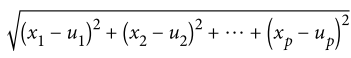
Another common distance metric for numeric data is **Manhattan distance**:
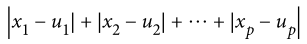

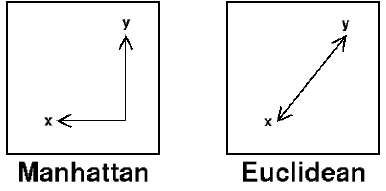

Euclidean distance corresponds to the straight-line distance between two points. Manhattan distance is the distance between two points traversed in a single direction at a time (e.g., traveling along rectangular city blocks). For this reason, Manhattan distance is a useful approximation if similarity is defined as point-to-point travel time.

More distance metrics supported by scikit-learn (http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html):
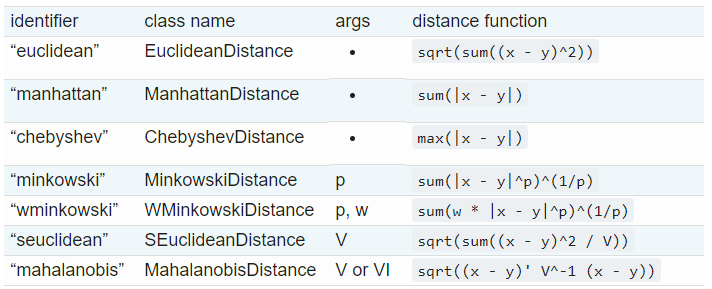

In [4]:
'''
scikitlearn has more distances available

minkowski. Have to specify hyperparameter P. 
    Take euclidean distance. Instead of doing (x1-u1)^2, we can do a higher degree. 
        P=3 then ((x1-u1)^3 + (x2-u2)^3)^1/3
'''

'\nscikitlearn has more distances available\n\nminkowski. Have to specify hyperparameter P. \n    Take euclidean distance. Instead of doing (x1-u1)^2, we can do a higher degree. \n        P=3 then ((x1-u1)^3 + (x2-u2)^3)^1/3\n'

### Discuss: 
What do we get with "minkowski" and p=1?


What do we get with "minkowski" and p=2?


If we create a <a href="http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html">KNN classifier</a> w/o spedifying any parameters, what distance matrics will we use? See printed KNN model information below:

*KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, metric=’minkowski’, metric_params=None, n_jobs=1, **kwargs)[source]*



In [5]:
'''
What do we get with "minkowski" and p=1?
    We get Manhattan, AKA degree 1 minkowski

What do we get with "minkowski" and p=2?
    We get Euclidean
    

KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, metric=’minkowski’, metric_params=None, n_jobs=1, **kwargs)
 
 This shows DEFAULTS:
 n_neighbors=5
 metric=minkoski with p=2 (EUCLIDEAN default)

'''

'\nWhat do we get with "minkowski" and p=1?\n    We get Manhattan, AKA degree 1 minkowski\n\nWhat do we get with "minkowski" and p=2?\n    We get Euclidean\n    \n\nKNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, metric=’minkowski’, metric_params=None, n_jobs=1, **kwargs)\n \n This shows DEFAULTS:\n n_neighbors=5\n metric=minkoski with p=2 (EUCLIDEAN default)\n\n'

## KNN example
This is an an anonymized dataset with 10 features and one "target class" column. The target class is either 1 or 0.

## Import Libraries



In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Get the Data

Set index_col=0 to use the first column as the index.


In [14]:
# This is an "anonymized data"
df = pd.read_csv("datasets/Classified_Data",index_col=0)

In [15]:
df.head()
#see columns and data, but don't really know what they are (don't want you to know what you have) = anonymized
#transformed: maybe done PCA?


,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [16]:
features = df.drop('TARGET CLASS',axis=1)
features.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167


## Train Test Split

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(features,df['TARGET CLASS'],
                                                    test_size=0.30,random_state =100)

## Using KNN

Remember that we are trying to come up with a model to predict whether someone will TARGET CLASS or not. We'll start with k=1.

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
# try k =1 first, then we will use elbow method to choose the k value
knn = KNeighborsClassifier(n_neighbors=1)

In [21]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [22]:
pred = knn.predict(X_test)

In [23]:
# predicted values, 0s and 1s as we expected, but not so readable...
pred

array([0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1], d

## Predictions and Evaluations

Let's evaluate our KNN model!

In [25]:
from sklearn.metrics import classification_report,confusion_matrix

In [26]:
print(confusion_matrix(y_test,pred))
#each column is a predicted label
#144 predicted to be 0 and acutally 0
#130 predicted to be 1 and acutally 1


[[144  18]
 [  8 130]]


In [27]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92       162
           1       0.88      0.94      0.91       138

    accuracy                           0.91       300
   macro avg       0.91      0.92      0.91       300
weighted avg       0.92      0.91      0.91       300



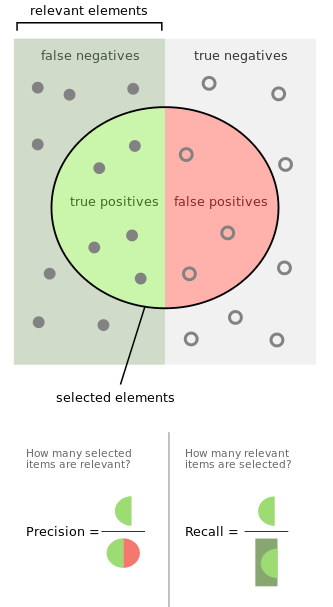

In [ ]:
'''
When we are evaluating this result, 
    considering false positive and a false negative giving same weight (considering equally bad)

Not always the case: 

Selling cars: see customer info, predict if customer is interested in luxury cars or not. 
    Model predicts yes, this customer will be interested in luxury car but actually customer is not
        FALSE POSITIVE
        Loss not so bad: just wasted a couple minutes
    Model predicts no, this customer will not be interested in luxury car but actually customer is interested
        FALSE NEGATIVE
        Loss bad: thousands of dollars
        
In this case, False positive not as bad as False negative

'''

## Exercise:

Since this is an anonymized dataset, we do not know the data resource. 

1. Try "minkowski" and p=3, what result will you get?
2. Try "minkowski" and p=1 and "manhattan" as the distance metrics (with n_neighbors=7), did you get the same result?

In [ ]:
# do BOTH with n_neighors =7

In [51]:
# "minkowski" and p=3
knn3= KNeighborsClassifier(p=3, n_neighbors=1) #could have said metric='minkowski' but implied

In [52]:
knn3.fit(X_train,y_train)
pred3=knn3.predict(X_test)
print(confusion_matrix(y_test,pred3))
print(classification_report(y_test,pred3))

[[146  16]
 [  8 130]]
              precision    recall  f1-score   support

           0       0.95      0.90      0.92       162
           1       0.89      0.94      0.92       138

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [39]:
# "minkowski", p=1, n_neighbors=7
knn17= KNeighborsClassifier(p=1, n_neighbors=7)

In [40]:
knn17.fit(X_train,y_train)
pred17=knn17.predict(X_test)
print(confusion_matrix(y_test,pred17))
print(classification_report(y_test,pred17))

[[144  18]
 [  5 133]]
              precision    recall  f1-score   support

           0       0.97      0.89      0.93       162
           1       0.88      0.96      0.92       138

    accuracy                           0.92       300
   macro avg       0.92      0.93      0.92       300
weighted avg       0.93      0.92      0.92       300



In [45]:
# "manhattan", n_neighbors=7
knnm7= KNeighborsClassifier(metric='manhattan', n_neighbors=7)

In [47]:
knnm7.fit(X_train,y_train)
predm7=knnm7.predict(X_test)
print(confusion_matrix(y_test,predm7))
print(classification_report(y_test,predm7))

[[144  18]
 [  5 133]]
              precision    recall  f1-score   support

           0       0.97      0.89      0.93       162
           1       0.88      0.96      0.92       138

    accuracy                           0.92       300
   macro avg       0.92      0.93      0.92       300
weighted avg       0.93      0.92      0.92       300



In [53]:
# "manhattan", n_neighbors=7
# do you still need to specify the argument p in this case?
#no, because that is inmplied in Manhattan metric argument 


3.Try to use euclidean distance with different values of n_neighbors. With which n_neighbors did you get the best result? If you increase n_neighbors, does this improve the performance?

In [48]:
#K=5
knn= KNeighborsClassifier()
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))


[[146  16]
 [  6 132]]
              precision    recall  f1-score   support

           0       0.96      0.90      0.93       162
           1       0.89      0.96      0.92       138

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



In [49]:
#K=6
knn= KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))


[[150  12]
 [  8 130]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       162
           1       0.92      0.94      0.93       138

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



In [50]:
#K=10
knn= KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[150  12]
 [  7 131]]
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       162
           1       0.92      0.95      0.93       138

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



# To sum up:
- distance metrics：
    - euclidean 
    - manhattan
    - minkowski (you need to specify a k value)